<a href="https://colab.research.google.com/github/icarogga/8puzzle/blob/main/8puzzle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import copy
import matplotlib.pyplot as plt

In [114]:
def valid(x,y):
    r = True
    if x < 0 : r = False
    if x > 2 : r = False
    if y < 0 : r = False
    if y > 2 : r = False
    return r



# s = [[4,1,3],[2,5,6],[0,7,8]]

# 4 1 3
# 2 5 6
# 0 7 8

def sons(s):
    r = []
    x = None
    y = None
    #localiza zero
    for i in range(len(s)):
        for j in range(len(s[i])):
            if s[i][j] == 0:
                x = i
                y = j
    # cima
    vx = x - 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)
    # baixo
    vx = x + 1
    vy = y
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)

    # direita
    vx = x 
    vy = y +1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)

    # esquerda
    vx = x 
    vy = y - 1
    if (valid(vx,vy)):
        ts = copy.deepcopy(s)
        t = ts[vx][vy]
        ts[vx][vy] = ts[x][y]
        ts[x][y] = t
        r.append(ts)

    return r

In [115]:
def printPuzzle(s):
    for v in s:
        print(v)

def son2str(s):
    s1 = s[0]+s[1]+s[2]
    return ''.join([str(v) for v in s1])

In [116]:
def bfs(start,goal):
    l = [start]
    fathers = dict()
    visited = [start]
    while (len(l)>0):
        father = l[0]
        del l[0]
        for son in sons(father):
            if son not in visited:
                visited.append(son)
                print(len(visited))
                fathers[son2str(son)] = father
                if son == goal:
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    print(res)
                    return res
                else:
                    l.append(son)
    print("Sem Solucao")

In [117]:

s = [[4,1,3],[2,5,6],[0,7,8]]

# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
#resp = bfs(s,[[1,2,3],[4,5,6],[7,8,0]])
#for s in resp:
#    printPuzzle(s)
#    print()

In [118]:
def h2(a,b): # distancia de manhatan
    dist = 0
    tam = len(a)*len(a[0])
    v = [[] for i in range(tam)]
    for i in range(len(a)):
        for j in range(len(a[i])):
            v[a[i][j]].append((i,j))
            v[b[i][j]].append((i,j))
    for i in range(tam):
        dist += abs(v[i][0][0]-v[i][1][0]) + abs(v[i][0][1]-v[i][1][1])
    return dist

In [119]:
start = [[4,1,3],[2,5,6],[0,7,8]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8

In [120]:
from heapq import heappush, heappop

In [121]:
def busca_heuristica(start,goal,heuristica):
    h = []
    heappush(h,(heuristica(start,goal),start))
    fathers = dict()
    visited = [start]
    while (len(h)>0):
        (_,father) = heappop(h)
        for son in sons(father):
            if son not in visited:
                visited.append(son)
                #print(len(visited))
                fathers[son2str(son)] = father
                if son == goal:
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    #print(res)
                    return res, len(visited)
                else:
                    heappush(h,(heuristica(son,goal),son))
    print("Sem Solucao")

In [122]:
#@title #Heurística 1
def h1(a,b): # numero de posições erradas
    dist = 0
    tam = len(a)*len(a[0])
    v = [[] for i in range(tam)]
    for i in range(len(a)):
        for j in range(len(a[i])):
          v[a[i][j]].append((i,j))
          v[b[i][j]].append((i,j))
    for i in range(tam):
        if v[i][0] != v[i][1]:
          dist+=1
    return dist

In [123]:
#@title # A*
def A_estrela(start,goal,heuristica):
    h = []
    profundidade = 0
    heappush(h,(heuristica(start,goal)+profundidade,start, profundidade))
    fathers = dict()
    visited = [start]
    while (len(h)>0):
        (_,father, profundidade) = heappop(h)
        for son in sons(father):
            if son not in visited:
                visited.append(son)
                #print(len(visited))
                fathers[son2str(son)] = father
                if son == goal:
                    res = []
                    node = son
                    while node != start:
                        res.append(node)
                        node = fathers[son2str(node)]
                    res.append(start)
                    res.reverse()
                    #print(res)
                    return res, len(visited)
                else:
                    heappush(h,(heuristica(son,goal)+profundidade,son, profundidade+1))
    print("Sem Solucao")

In [124]:
#@title #h1: 5 movimentos { run: "auto" }
start = [[1,2,3],[5,6,0],[4,7,8]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
resp, num_nos = busca_heuristica(start,goal,h1)
cont = -1
for s in resp:
    cont+=1
    #printPuzzle(s)
    #print()
print("O número de movimentos foi:",cont)

O número de movimentos foi: 5


In [125]:
#@title #h1: 10 movimentos { run: "auto" }
start = [[1,2,3],[6,0,8],[5,4,7]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
resp, num_nos = busca_heuristica(start,goal,h1)
cont = -1
for s in resp:
    cont+=1
    #printPuzzle(s)
    #print()
print("O número de movimentos foi:",cont)


O número de movimentos foi: 10


In [126]:
#@title #h1: 15 movimentos { run: "auto" }
start = [[1,2,3],[0,4,5],[6,7,8]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
resp, num_nos = busca_heuristica(start,goal,h1)
cont = -1
for s in resp:
    cont+=1
    #printPuzzle(s)
    #print()
print("O número de movimentos foi:",cont)

O número de movimentos foi: 15


In [127]:
#@title #h1:  20 movimentos { run: "auto" }
start = [[2,3,5],[1,4,8],[6,7,0]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
resp, num_nos = busca_heuristica(start,goal,h1)
cont = -1
for s in resp:
    cont+=1
    #printPuzzle(s)
    #print()
print("O número de movimentos foi:",cont)

O número de movimentos foi: 20


In [128]:
#@title #h1:  25 movimentos { run: "auto" }
start = [[2,4,3],[1,7,5],[6,0,8]]
goal  = [[1,2,3],[4,5,6],[7,8,0]]
# 4 1 3       1 2 3
# 2 5 6   ->  4 5 6
# 0 7 8       7 8 0
# 1 +2 +0+1+0 +0+1+1+2 = 8
resp, num_nos = busca_heuristica(start,goal,h1)
cont = -1
for s in resp:
    cont+=1
    #printPuzzle(s)
    #print()
print("O número de movimentos foi:",cont)

O número de movimentos foi: 25


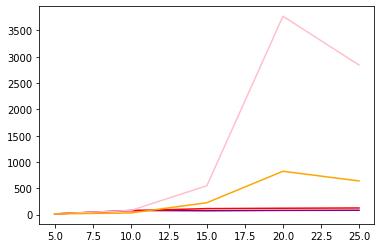

In [129]:
#@title # Gráficos das Heurísticas 1 e 2 (Hill Climbing) e (A*) { run: "auto" }
num_movimentos = [5,10,15,20,25]

puzzles = [[[1,2,3],[5,6,0],[4,7,8]], #  5 movimentos
           [[1,2,3],[6,0,8],[5,4,7]], # 10 movimentos
           [[1,2,3],[0,4,5],[6,7,8]], # 15 movimentos
           [[2,3,5],[1,4,8],[6,7,0]], # 20 movimentos
           [[2,4,3],[1,7,5],[6,0,8]]] # 25 movimentos

num_nos_h1 = []
num_nos_h2 = []
num_nos_A_star = []
A_star_h1 = []
A_star_h2 = []

for i in range(0,5):
  resp, num_nos = busca_heuristica(puzzles[i], goal, h1)
  num_nos_h1.append(num_nos)
  resp, num_nos = busca_heuristica(puzzles[i], goal, h2)
  num_nos_h2.append(num_nos)

for i in range(0,5):
  resp, num_nos = A_estrela(puzzles[i], goal, h1)
  A_star_h1.append(num_nos)
  resp, num_nos = A_estrela(puzzles[i], goal, h2)
  A_star_h2.append(num_nos)

# O gráfico da Heurística 1(Hill Climbing) é representado pela cor roxo
plt.plot(num_movimentos, num_nos_h1, color = 'purple')

# O gráfico da Heurística 2(Hill Climbing) é representado pela cor vermelho
plt.plot(num_movimentos, num_nos_h2, color = 'red')

# O gráfico da Heurística 2(A*) é representado pela cor rosa
plt.plot(num_movimentos, A_star_h1, color = 'pink')

# O gráfico da Heurística 2(A*) é representado pela cor laranja
plt.plot(num_movimentos, A_star_h2, color = 'orange')
